In [90]:
from re import A
import pandas as pd;
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np;
from sklearn.linear_model import Ridge
from sklearn import linear_model


In [91]:
n_users = 1415

print ('Number of users: ', n_users)

ratings_base = pd.read_csv('./data/datasets/rating/kfold/u5.base.csv', sep=',', encoding='latin-1')
ratings_test = pd.read_csv('./data/datasets/rating/kfold/u5.test.csv', sep=',', encoding='latin-1')

Number of users:  1415


In [92]:
movies = pd.read_csv('./data/datasets/movie/ml_details.csv', sep=',', encoding='latin-1')

In [93]:
movies.head()

,movie id,title,series,release year,certification,duration,average rating,rating total,genre list,content,...,Romance,Drama,Reality-TV,Crime,Comedy,Adventure,News,War,Action,movie index
0,tt8510350,Satanic Panic,NaN,2019,Not Rated,1h 25m,5.6,5.3K,Comedy|Horror,A pizza delivery girl at the end of her financ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,tt0083630,The Beastmaster,NaN,1982,PG,1h 58m,6.2,22K,Action|Adventure|Fantasy,A sword-and-sorcery fantasy about a young man'...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,174
2,tt0119707,Mortal Kombat: Annihilation,NaN,1997,PG-13,1h 35m,3.7,53K,Action|Adventure|Fantasy,A group of martial arts warriors have only six...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,159
3,tt5607976,His Dark Materials,TV Series,2019â,TV-14,1h,7.9,59K,Adventure|Drama|Family,A young girl is destined to liberate her world...,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,161
4,tt0088814,The Black Cauldron,NaN,1985,PG,1h 20m,6.4,34K,Animation|Action|Adventure,A young boy and a group of misfit friends emba...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,162


In [94]:
movies_util = pd.DataFrame(columns=['movie id', 'movie index util'])

In [95]:
movies_util['movie id'] = movies['movie id'].value_counts().index.tolist()

In [96]:
movies_util['movie index util'] = np.arange(len(movies['movie id'].value_counts()))

In [97]:
movies_util.head()

,movie id,movie index util
0,tt8510350,0
1,tt1263670,1
2,tt3337194,2
3,tt0959337,3
4,tt4206804,4


In [98]:
CB_movies = pd.merge(movies, movies_util, how='inner', on='movie id')

In [99]:
users_util = pd.DataFrame(columns=['user id', 'user index util'])

In [100]:
CB_movies.head()

,movie id,title,series,release year,certification,duration,average rating,rating total,genre list,content,...,Drama,Reality-TV,Crime,Comedy,Adventure,News,War,Action,movie index,movie index util
0,tt8510350,Satanic Panic,NaN,2019,Not Rated,1h 25m,5.6,5.3K,Comedy|Horror,A pizza delivery girl at the end of her financ...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1,tt0083630,The Beastmaster,NaN,1982,PG,1h 58m,6.2,22K,Action|Adventure|Fantasy,A sword-and-sorcery fantasy about a young man'...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,174,2091
2,tt0119707,Mortal Kombat: Annihilation,NaN,1997,PG-13,1h 35m,3.7,53K,Action|Adventure|Fantasy,A group of martial arts warriors have only six...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,159,5586
3,tt5607976,His Dark Materials,TV Series,2019â,TV-14,1h,7.9,59K,Adventure|Drama|Family,A young girl is destined to liberate her world...,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,161,5585
4,tt0088814,The Black Cauldron,NaN,1985,PG,1h 20m,6.4,34K,Animation|Action|Adventure,A young boy and a group of misfit friends emba...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,162,5584


In [101]:
CB_movies.shape

(8362, 44)

In [102]:

movies = CB_movies
no_movies = movies.shape[0]
print('No movie themes: ', no_movies)
print(movies.shape)
X_train = movies[["Biography","Music","History","Thriller","Fantasy","Sport","Animation","Game-Show","Horror","Musical","Family","Mystery","Talk-Show","Documentary","Sci-Fi","Film-Noir","Short","Western","Romance","Drama","Reality-TV","Crime","Comedy","Adventure","News","War","Action",]].values[:, :]

transformer = TfidfTransformer(smooth_idf=True, norm='l2')
tfidf = transformer.fit_transform(X_train).toarray()

print("tfidf: ", tfidf.shape)


No movie themes:  8362
(8362, 44)
tfidf:  (8362, 27)


In [103]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [104]:
ratings_base = pd.merge(ratings_base, movies_util, how='inner', on='movie id')
ratings_test = pd.merge(ratings_test, movies_util, how='inner', on='movie id')

In [105]:
# print(type(ratings_base))
ratings_train_arr = ratings_base.values[1:, :]
# print(type(ratings_train_arr))
ratings_test_arr = ratings_test.values[1:, :]


print('ratings_train_shape: ', ratings_train_arr.shape)
print('ratings_test_shape: ', ratings_test_arr.shape)


ratings_train_shape:  (94711, 8)
ratings_test_shape:  (23677, 8)


In [106]:
ratings_train_arr[:1]

array([[0, 'tt8510350', 'ur22654354', 2,
        'I wasn\'t really sure what I was getting myself into when I sat down to watch the 2019 movie "Satanic Panic" from director Chelsea Stardust. I had sort of expected a horror comedy.And sure, the movie is labeled as a horror comedy, but it utterly failed on both accounts. I wasn\'t the least bit amused with the events taking place on the screen throughout the movie as the insanely mundane and generic storyline unfurled. It was just atrocious how generic and stereotypical everything in this movie turned out to be."Satanic Panic" offers nothing new to the horror genre, and it turned out to be a dead fish in the water sort of movie. The writers sat out to accomplish a heap of things with the storyline, but it wasn\'t a fulfilling experience to watch on the screen.The acting in the movie was adequate, but the actors and actresses could do nothing to manage to salvage this train wreck that was fast sliding down a very steep hill.It should be s

In [107]:
ratings_base.head()

,movie index,movie id,user id,rating,content,date,user index,movie index util
0,0,tt8510350,ur5876717,4,"Not the running time in any sense, but this se...",31 October 2019,1412,0
1,0,tt8510350,ur22654354,2,I wasn't really sure what I was getting myself...,9 September 2019,1401,0
2,0,tt8510350,ur12844960,4,I didn't know what to expect of this flick bec...,2 May 2020,1347,0
3,0,tt8510350,ur0806494,4,2019 Oak Cliff Film Festival\nGreetings again ...,11 June 2019,1368,0
4,0,tt8510350,ur77881167,3,Sam (Hayley Griffith) delivers pizza and compo...,31 October 2019,1405,0


In [108]:
def get_movies_rated_by_user(utility_matrix, user_index):
    user_index_list = utility_matrix[:, 6]
    row_ids = np.where(user_index_list == user_index)[0]
    movie_index_util_list = utility_matrix[row_ids, -1]
    rating_list = utility_matrix[row_ids, 3]
    return (movie_index_util_list, rating_list)



In [109]:
get_movies_rated_by_user(ratings_train_arr, 1336 )

(array([5526, 5732, 6178, 5861, 6146, 5889, 5911, 4539, 5982, 5972, 5809,
        5806, 5997, 5259, 5478, 5667, 5323, 5293, 5345, 6129, 6142, 6044,
        6068, 6081, 4852, 4933, 4912, 7655, 7649, 7692, 7699, 4877, 4879,
        4884, 7668, 4776, 4831, 4812, 4748, 4765, 4709, 4711, 7383, 7754,
        7755, 7407, 7447, 7359, 7520, 7530, 7331, 7335, 7319, 7380, 7711,
        7621, 7598, 7601, 7608, 7588, 7581, 7584, 7772, 7827, 7817, 4250,
        4255, 4630, 4622, 4243, 4285, 4492, 4485, 4489, 4560, 4568, 4465,
        4679, 4574, 5020, 5174, 4335, 4384, 5084, 5093, 4344, 4352, 6280,
        6290, 6297, 6274, 6396, 6380, 6381, 6469, 6793, 6762, 6734, 6783,
        6749, 6755, 6676, 6534, 6364, 6722, 6725, 7210, 7218, 7282, 7285,
        6878, 6920, 6893, 7056, 7142, 7128, 6465, 7097, 7105, 7094, 7178,
        8304, 8114, 8116, 8288, 8244, 8246, 8335, 8350, 8333, 7469, 7501,
        7492, 8188, 8211, 8213, 8219, 8221, 8168, 8203, 8204, 8193, 7841,
        8173, 8180, 8082, 8016, 8031, 

In [110]:
ratings_base[ratings_base['user index'] == 1414]

,movie index,movie id,user id,rating,content,date,user index,movie index util
20,1,tt3289956,ur2898520,4,The body of a dead young woman is found buried...,22 February 2018,1414,5501
40,2,tt0097179,ur2898520,2,Some arrive while others leave an American und...,5 November 2017,1414,5698
61,3,tt5220122,ur2898520,3,"In 1897 Transylvania, the monsters are being h...",21 September 2018,1414,5697
80,4,tt1525366,ur2898520,4,Garda Lisa Nolan (Ruth Bradley) arrives at Eri...,9 August 2016,1414,5696
101,5,tt4733640,ur2898520,4,It's 1880 London. A series of gruesome murders...,26 August 2018,1414,5695
...,...,...,...,...,...,...,...,...
94638,5765,tt1567432,ur2898520,4,Scott McCall (Tyler Posey) joins his best frie...,18 January 2018,1414,333
94654,5766,tt7599942,ur2898520,3,"FBI agent Will Chase (Scott Foley), codename W...",16 May 2019,1414,332
94668,5767,tt0116287,ur2898520,3,Nicole Walker (Reese Witherspoon) is a rebelli...,11 November 2013,1414,368
94683,5768,tt6852872,ur2898520,3,Elizabeth (Abbey Lee) is the new trophy wife o...,12 January 2019,1414,369


In [111]:
no_movie_theme = tfidf.shape[1]
w = np.zeros((no_movie_theme, n_users))
b = np.zeros((1, n_users))



In [112]:
user_index_list = ratings_base['user index'].value_counts().index.tolist()

In [113]:
ratings_base[ratings_base['user index'] == 1414]

,movie index,movie id,user id,rating,content,date,user index,movie index util
20,1,tt3289956,ur2898520,4,The body of a dead young woman is found buried...,22 February 2018,1414,5501
40,2,tt0097179,ur2898520,2,Some arrive while others leave an American und...,5 November 2017,1414,5698
61,3,tt5220122,ur2898520,3,"In 1897 Transylvania, the monsters are being h...",21 September 2018,1414,5697
80,4,tt1525366,ur2898520,4,Garda Lisa Nolan (Ruth Bradley) arrives at Eri...,9 August 2016,1414,5696
101,5,tt4733640,ur2898520,4,It's 1880 London. A series of gruesome murders...,26 August 2018,1414,5695
...,...,...,...,...,...,...,...,...
94638,5765,tt1567432,ur2898520,4,Scott McCall (Tyler Posey) joins his best frie...,18 January 2018,1414,333
94654,5766,tt7599942,ur2898520,3,"FBI agent Will Chase (Scott Foley), codename W...",16 May 2019,1414,332
94668,5767,tt0116287,ur2898520,3,Nicole Walker (Reese Witherspoon) is a rebelli...,11 November 2013,1414,368
94683,5768,tt6852872,ur2898520,3,Elizabeth (Abbey Lee) is the new trophy wife o...,12 January 2019,1414,369


In [114]:
user_index_list[:4]

[1414, 1413, 1412, 1411]

In [115]:
print(tfidf.shape)

(8362, 27)


In [116]:
for i in user_index_list:
    movie_index_util_list, rating_list = get_movies_rated_by_user(ratings_train_arr, i)
    ridge = Ridge(alpha=0.01, fit_intercept=True)
    tfdif_by_user = tfidf[movie_index_util_list.tolist()]
    ridge.fit(tfdif_by_user, rating_list)

    w[:, i] = ridge.coef_
    b[0, i] = ridge.intercept_

Predict for user  1414


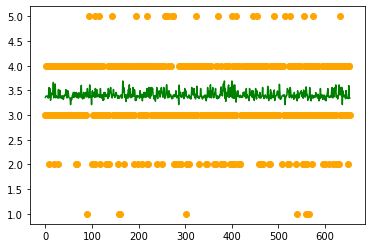

RMSE:  0.7505291585394311
--------------------------------
Predict for user  1413


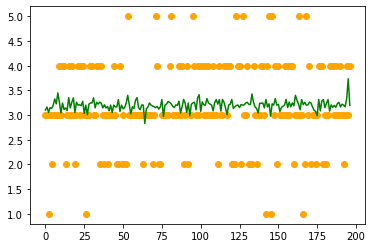

RMSE:  0.8544266400792745
--------------------------------
Predict for user  1412


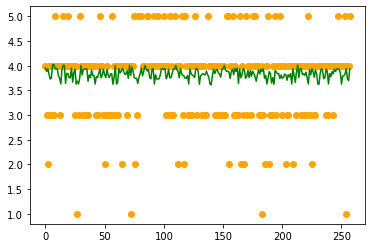

RMSE:  0.8403785619726541
--------------------------------
Predict for user  1411


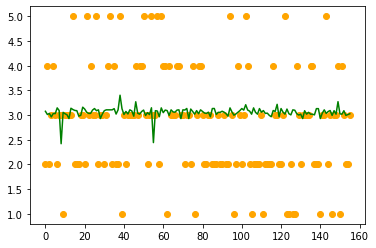

RMSE:  1.0718220471998352
--------------------------------
Predict for user  1410


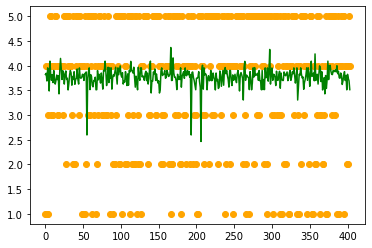

RMSE:  1.351425470913737
--------------------------------
Predict for user  1409


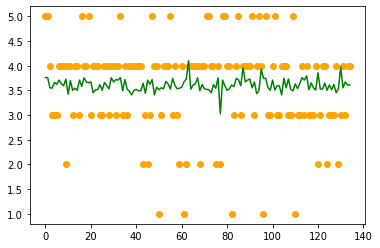

RMSE:  0.9412575738115756
--------------------------------
Predict for user  1408


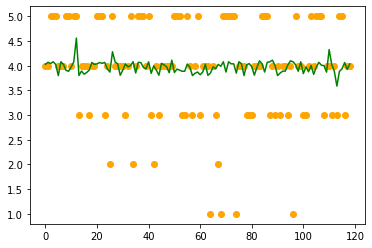

RMSE:  0.9497642428772922
--------------------------------
Predict for user  1407


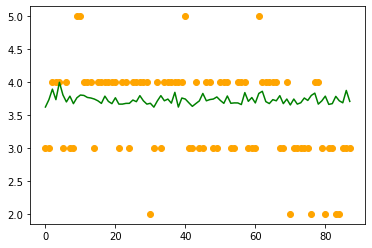

RMSE:  0.7143976683732619
--------------------------------
Predict for user  1406


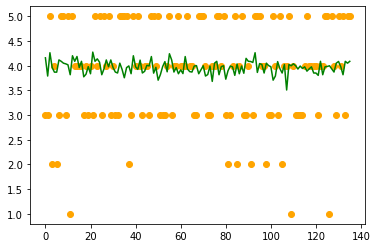

RMSE:  1.0089111664214545
--------------------------------
Predict for user  1405


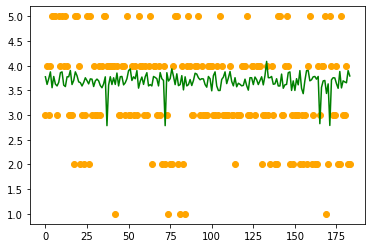

RMSE:  1.067486956071565
--------------------------------
Predict for user  1403


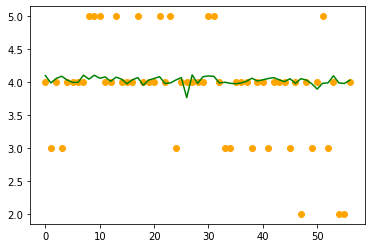

RMSE:  0.7442608945021097
--------------------------------
Predict for user  1404


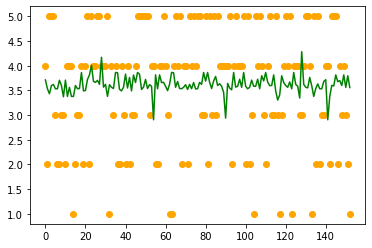

RMSE:  1.2249367030325307
--------------------------------
Predict for user  1400


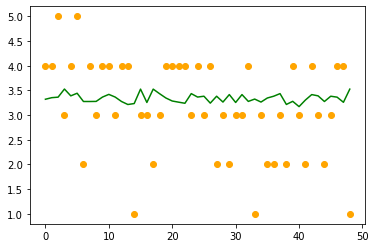

RMSE:  1.005564397827256
--------------------------------
Predict for user  1402


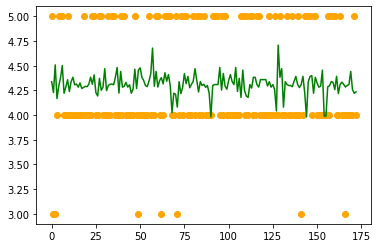

RMSE:  0.5538905182869577
--------------------------------
Predict for user  1399


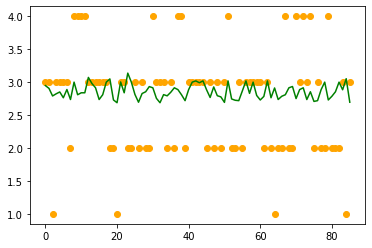

RMSE:  0.7885719137145407
--------------------------------
Predict for user  1401


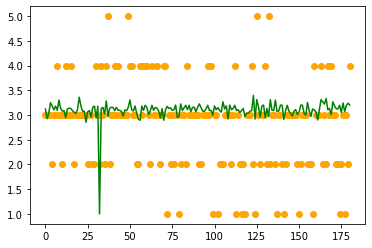

RMSE:  0.927363343400832
--------------------------------
Predict for user  1396


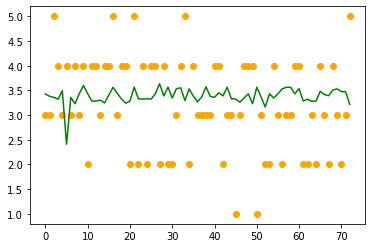

RMSE:  1.0136019096401039
--------------------------------
Predict for user  1397


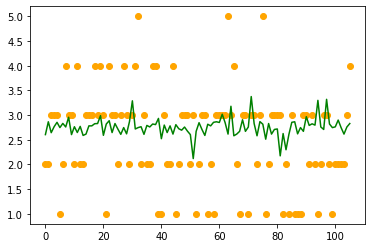

RMSE:  1.0211446394142911
--------------------------------
Predict for user  1395


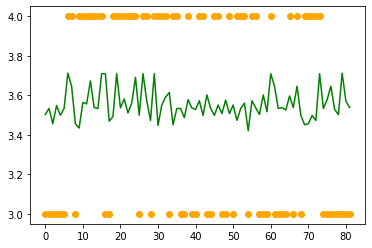

RMSE:  0.492197066994381
--------------------------------
Predict for user  1398


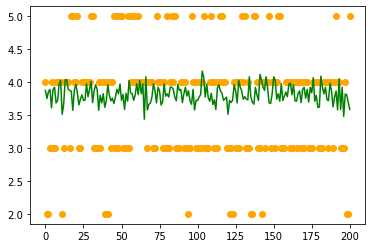

RMSE:  0.8260897507226005
--------------------------------
Predict for user  1394


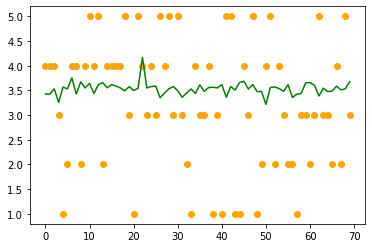

RMSE:  1.323421469399245
--------------------------------
Predict for user  1392


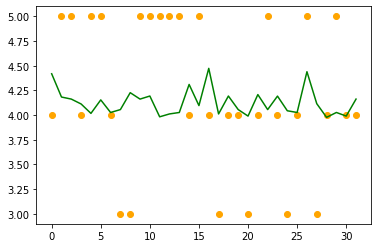

RMSE:  0.7489703554465661
--------------------------------
Predict for user  1393


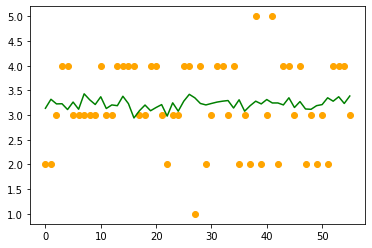

RMSE:  0.8581641081020037
--------------------------------
Predict for user  1390


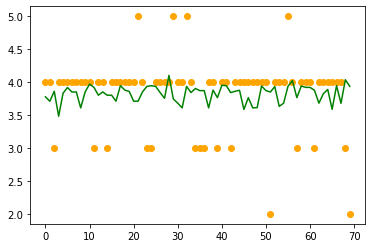

RMSE:  0.6038192421805254
--------------------------------
Predict for user  1391


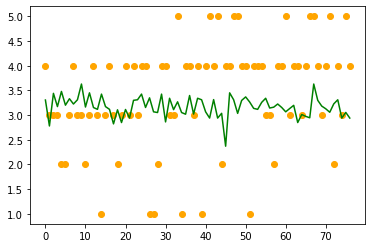

RMSE:  1.1483879740590837
--------------------------------
Predict for user  1389


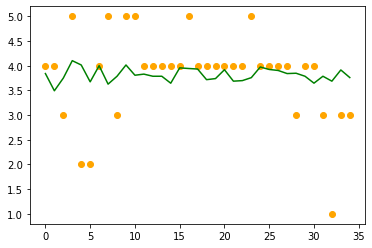

RMSE:  0.8757386346491207
--------------------------------
Predict for user  1388


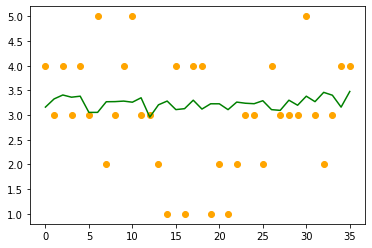

RMSE:  1.1212961539106099
--------------------------------
Predict for user  1383


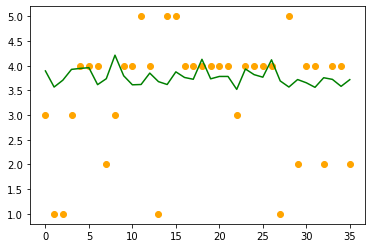

RMSE:  1.2041260830616172
--------------------------------
Predict for user  1380


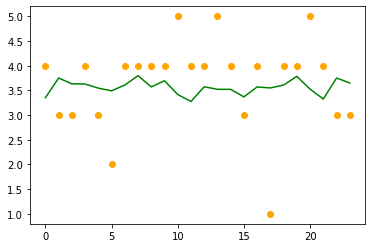

RMSE:  0.930548480229804
--------------------------------
Predict for user  1385


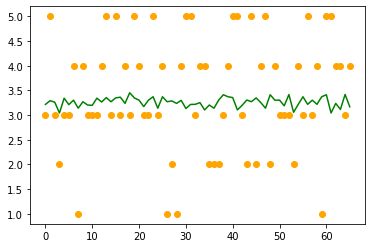

RMSE:  1.1576858183445111
--------------------------------
Predict for user  1387


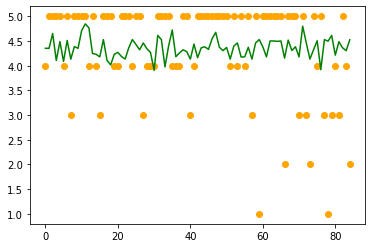

RMSE:  0.9836290303129628
--------------------------------
Predict for user  1386


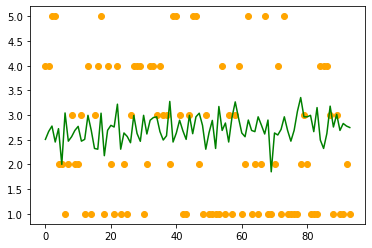

RMSE:  1.4553203166759685
--------------------------------
Predict for user  1384


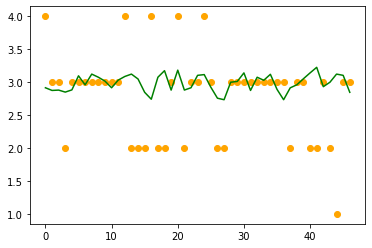

RMSE:  0.6949713510109221
--------------------------------
Predict for user  1381


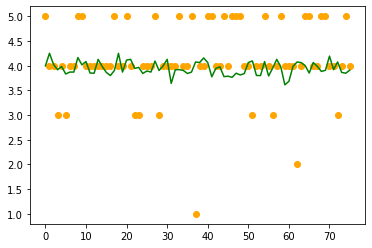

RMSE:  0.7810911169214139
--------------------------------
Predict for user  1379


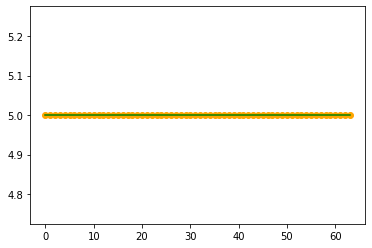

RMSE:  0.0
--------------------------------
Predict for user  1382


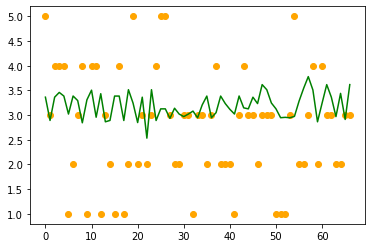

RMSE:  1.2042626568752863
--------------------------------
Predict for user  1378


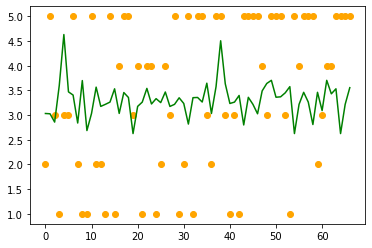

RMSE:  1.60457631173828
--------------------------------
Predict for user  1377


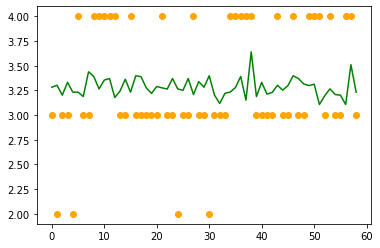

RMSE:  0.5922330997492286
--------------------------------
Predict for user  1375


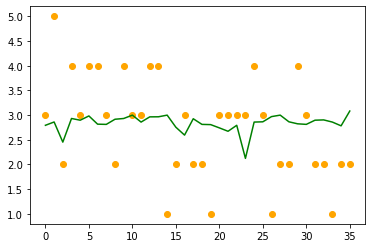

RMSE:  1.0315849440994986
--------------------------------
Predict for user  1376


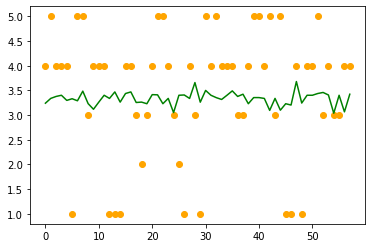

RMSE:  1.2914927381905594
--------------------------------
Predict for user  1374


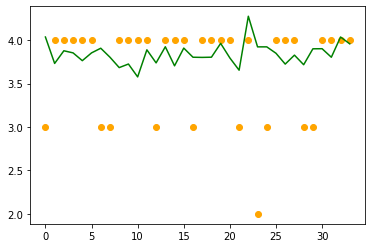

RMSE:  0.5707189918696378
--------------------------------
Predict for user  1373


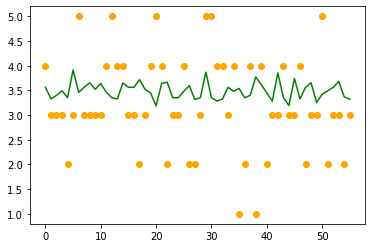

RMSE:  1.0589678512233436
--------------------------------
Predict for user  1372


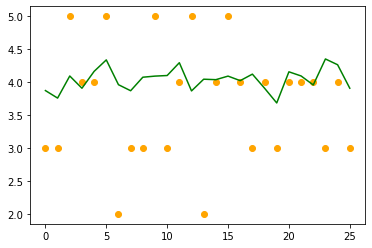

RMSE:  0.9049347067710992
--------------------------------
Predict for user  1371


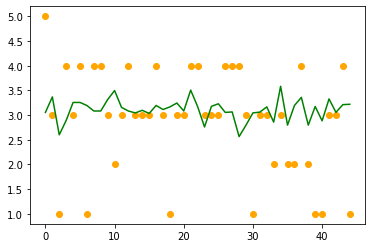

RMSE:  1.0617311731721484
--------------------------------
Predict for user  1368


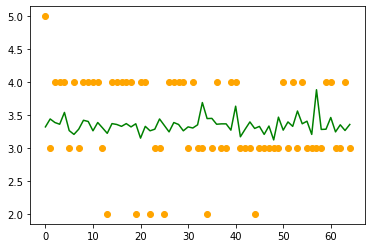

RMSE:  0.6858415104907846
--------------------------------
Predict for user  1358


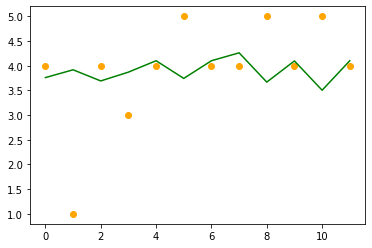

RMSE:  1.1225406136910432
--------------------------------
Predict for user  1366


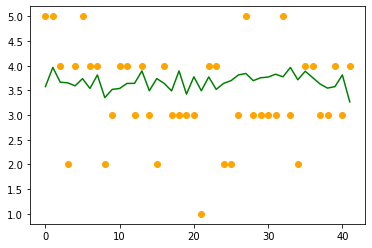

RMSE:  0.9752081349061753
--------------------------------
Predict for user  1370


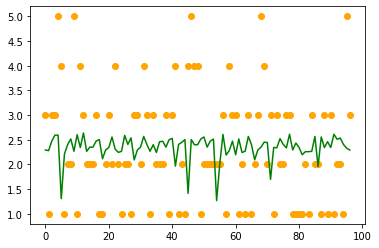

RMSE:  1.186757491218561
--------------------------------
Predict for user  1367


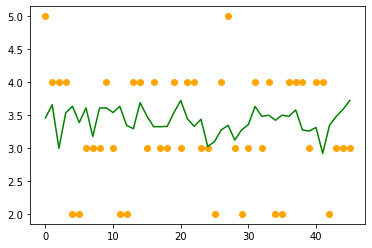

RMSE:  0.8584344219033675
--------------------------------
Predict for user  1369


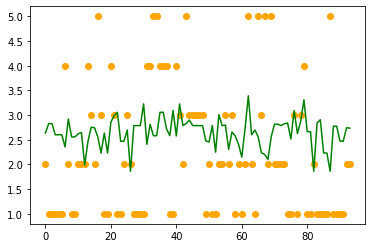

RMSE:  1.3918939351038009
--------------------------------
Predict for user  1363


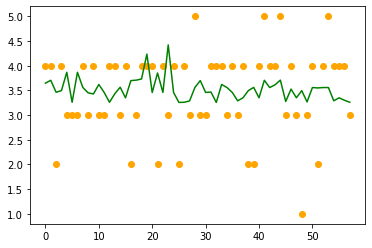

RMSE:  0.8893387171712752
--------------------------------
Predict for user  1361


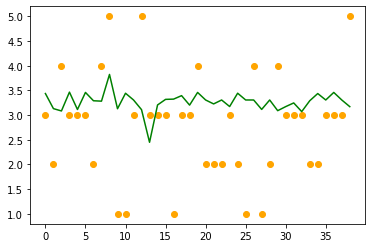

RMSE:  1.1787975648847069
--------------------------------
Predict for user  1364


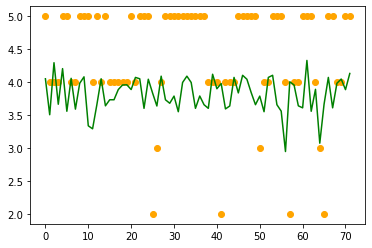

RMSE:  0.9887693001983879
--------------------------------
Predict for user  1360


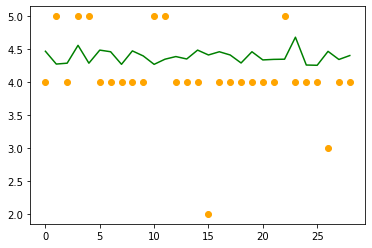

RMSE:  0.6970910857080475
--------------------------------
Predict for user  1357


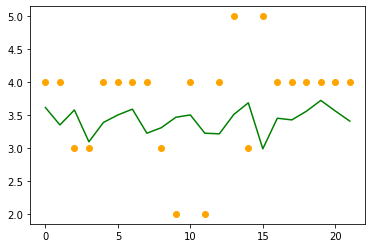

RMSE:  0.8283580882499665
--------------------------------
Predict for user  1355


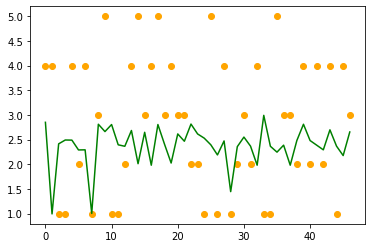

RMSE:  1.4599082581057279
--------------------------------
Predict for user  1353


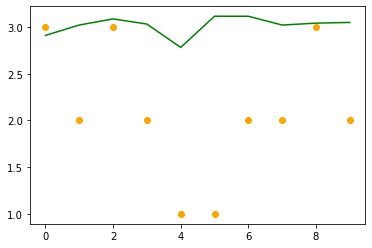

RMSE:  1.1468238640694066
--------------------------------
Predict for user  1351


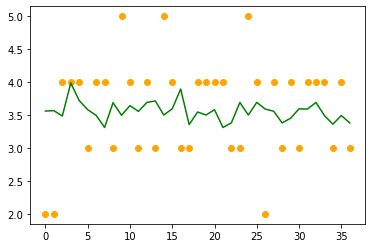

RMSE:  0.7722951782430743
--------------------------------
Predict for user  1356


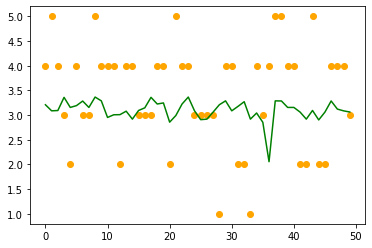

RMSE:  1.0709335372962752
--------------------------------
Predict for user  1362


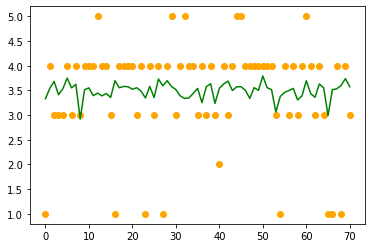

RMSE:  1.0347581840038018
--------------------------------
Predict for user  1365


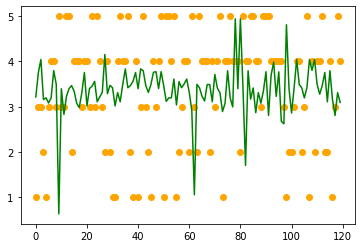

RMSE:  1.4308856692547958
--------------------------------
Predict for user  1359


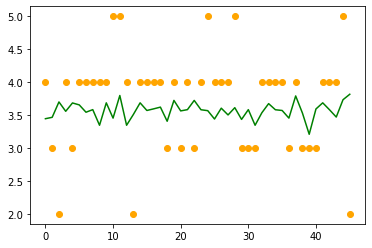

RMSE:  0.7530102237983539
--------------------------------
Predict for user  1354


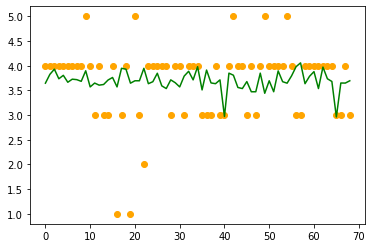

RMSE:  0.7584457213675829
--------------------------------
Predict for user  1350


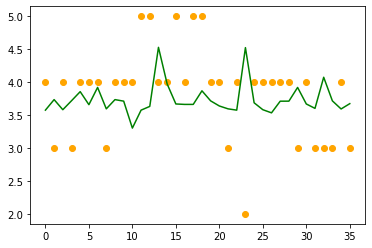

RMSE:  0.8004178190107393
--------------------------------
Predict for user  1348


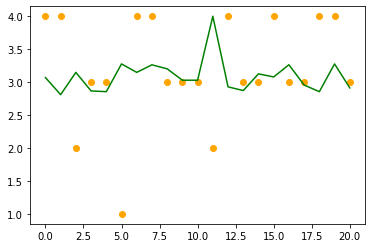

RMSE:  0.927699953061224
--------------------------------
Predict for user  1344


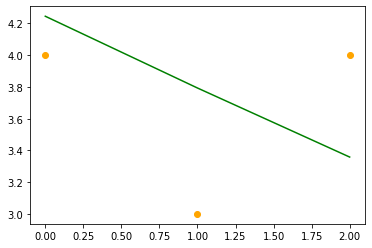

RMSE:  0.6059239919497568
--------------------------------
Predict for user  1352


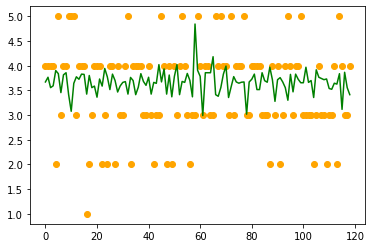

RMSE:  0.9528038628424573
--------------------------------
Predict for user  1347


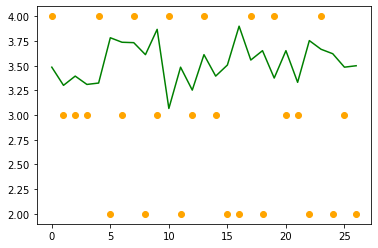

RMSE:  1.0483144998530045
--------------------------------
Predict for user  1349


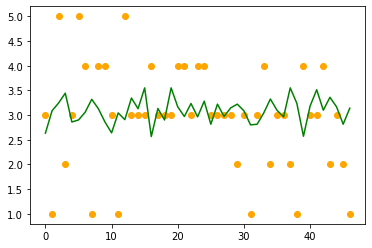

RMSE:  1.1535740276893107
--------------------------------
Predict for user  1345


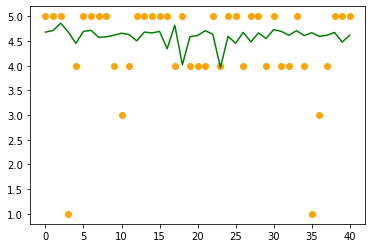

RMSE:  1.0107554126521172
--------------------------------
Predict for user  1343


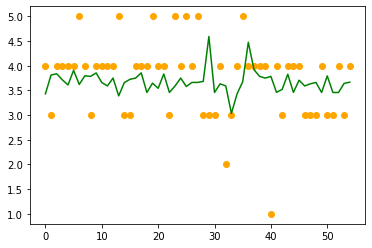

RMSE:  0.8148186857682426
--------------------------------
Predict for user  1329


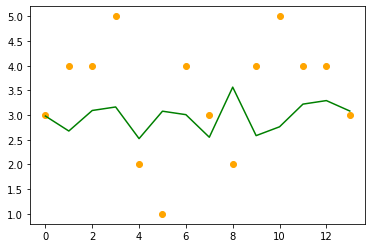

RMSE:  1.2618581305897902
--------------------------------
Predict for user  1339


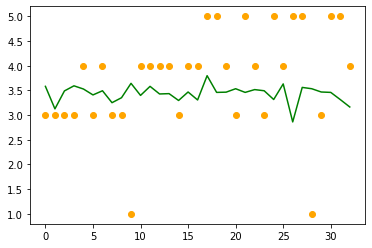

RMSE:  1.1039214786776126
--------------------------------
Predict for user  1338


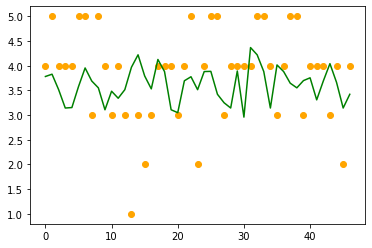

RMSE:  0.9930815921710375
--------------------------------
Predict for user  1335


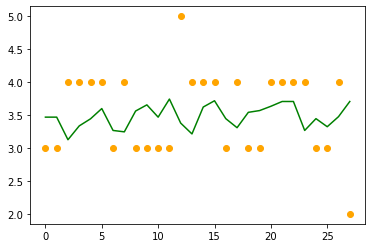

RMSE:  0.6910152821140768
--------------------------------
Predict for user  1336


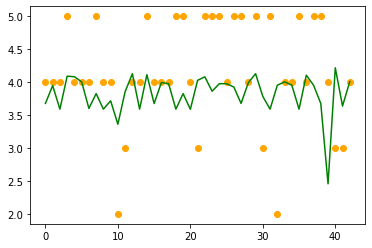

RMSE:  0.8831289759773933
--------------------------------
Predict for user  1333


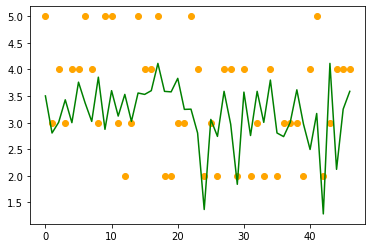

RMSE:  1.022953918455077
--------------------------------
Predict for user  1342


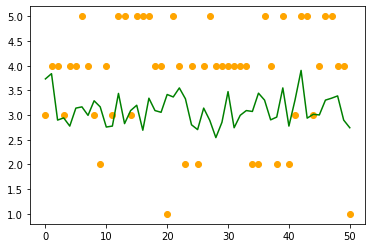

RMSE:  1.283954492895121
--------------------------------
Predict for user  1337


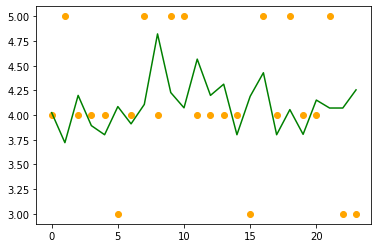

RMSE:  0.7262402345438693
--------------------------------
Predict for user  1323


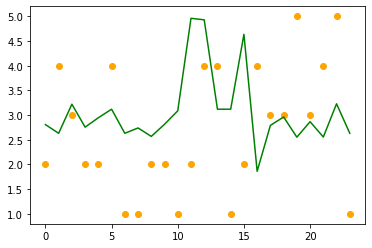

RMSE:  1.5298101229535366
--------------------------------
Predict for user  1331


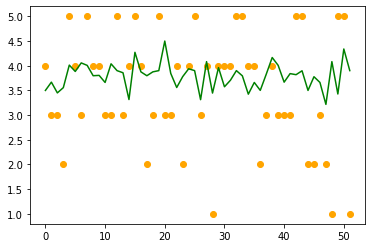

RMSE:  1.1521943946137227
--------------------------------
Predict for user  1332


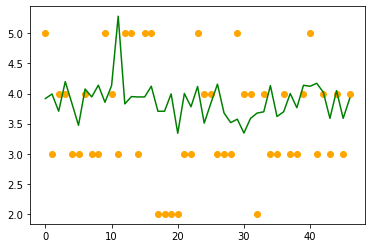

RMSE:  0.9811156730769244
--------------------------------
Predict for user  1330


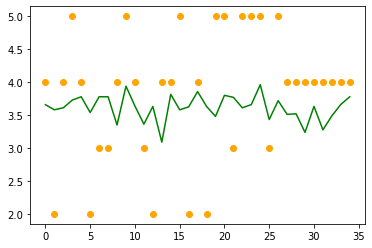

RMSE:  0.9827517669347314
--------------------------------
Predict for user  1325


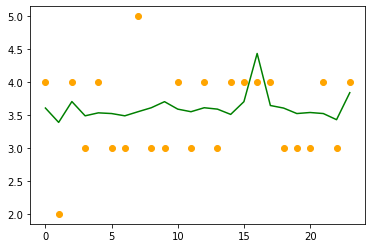

RMSE:  0.6155168173922638
--------------------------------
Predict for user  1334


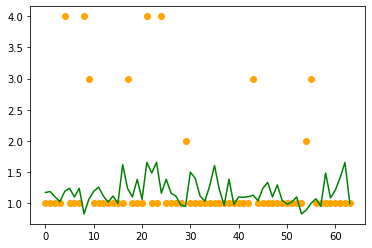

RMSE:  0.903268102665456
--------------------------------
Predict for user  1324


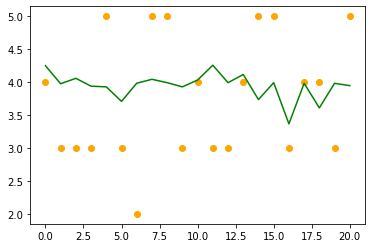

RMSE:  0.9498845937072733
--------------------------------
Predict for user  1328


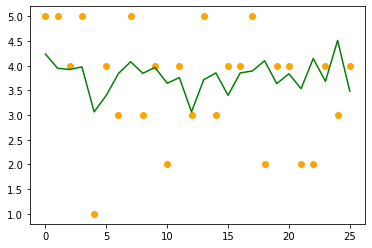

RMSE:  1.0843074926650076
--------------------------------
Predict for user  1321


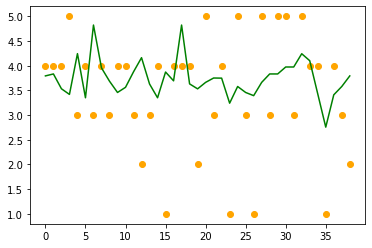

RMSE:  1.197469797633343
--------------------------------
Predict for user  1322


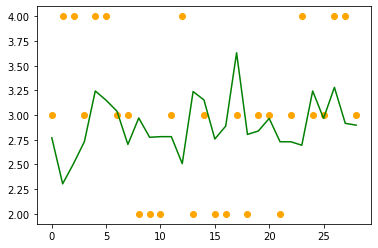

RMSE:  0.8115070684412309
--------------------------------
Predict for user  1340


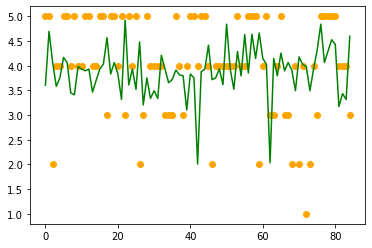

RMSE:  1.0927471175789145
--------------------------------
Predict for user  1320


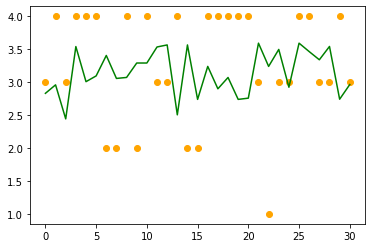

RMSE:  0.9714203210372372
--------------------------------
Predict for user  1327


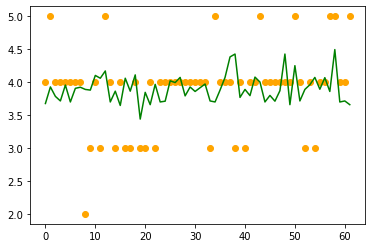

RMSE:  0.643413569225681
--------------------------------
Predict for user  1313


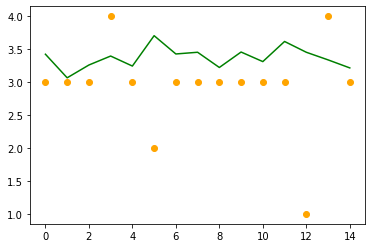

RMSE:  0.86452384422578
--------------------------------
Predict for user  1311


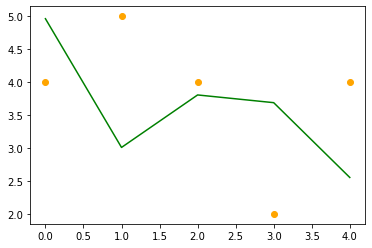

RMSE:  1.4052284369436192
--------------------------------
Predict for user  1316


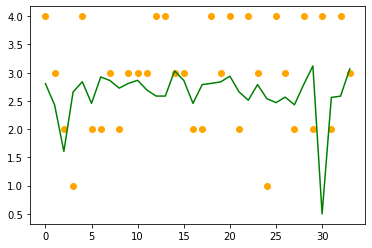

RMSE:  1.0881893579598092
--------------------------------
Predict for user  1308


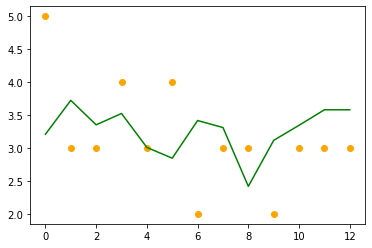

RMSE:  0.8724980707982725
--------------------------------
Predict for user  1302


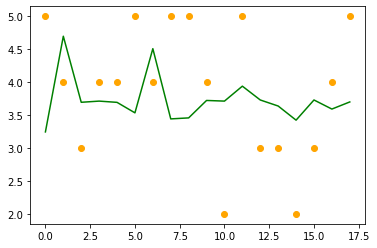

RMSE:  1.0782767243909424
--------------------------------
Predict for user  1309


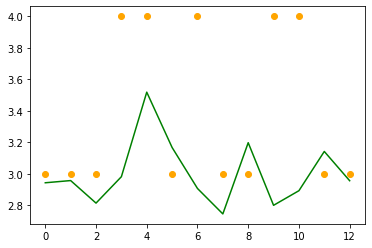

RMSE:  0.6402170504393825
--------------------------------
Predict for user  1299


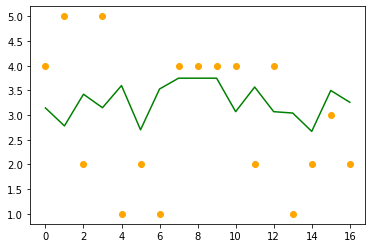

RMSE:  1.4463412706102103
--------------------------------
Predict for user  1315


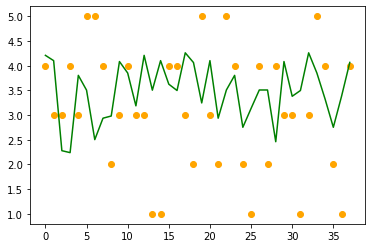

RMSE:  1.4095595191452361
--------------------------------


In [117]:
import matplotlib.pyplot as plt
Y = tfidf.dot(w)  + b;
for i in user_index_list[:100]:
    square_error = 0
    print("Predict for user ", i)
    np.set_printoptions(precision=2)
    movie_id_list, rating_list = get_movies_rated_by_user(ratings_test_arr, i)
    X = np.arange(len(rating_list))
    #print('True Rating List: ')
    #print(rating_list)
    plt.scatter(X, rating_list, color='orange')
    #print('Predict Rating List: ')
    #print(Y[movie_id_list.tolist(), i])
    plt.plot(X, Y[movie_id_list.tolist(), i], color='green')
    plt.show()

    for t in range(len(X)):
        square_error += (Y[movie_id_list.tolist(), i][t] - rating_list[t]) ** 2

    RMSE = np.sqrt(square_error/len(X))

    print('RMSE: ', RMSE)
        
    
    print('--------------------------------')